In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
from scipy.integrate import odeint  
import math

## Task 1

### Complete the template to make a graph that shows: steady state of tetRp reached vs. concentration of lacIp for different values of \(n\)



In [2]:
# model of repression p_lacI --| p_tetR
# at constant p_lacI levels

def sdot_repression(s,t,params):  
    
    km, km0, kdm, kp, kdp, K, n, p_lacI = params 
    m_tetR, p_tetR = s
    
    rate_m_tetR_prod = km*((K**n)/((K**n)+(p_lacI**n)))+km0   
    rate_p_tetR_prod = kp*m_tetR

    rate_m_tetR_loss = kdm*m_tetR
    rate_p_tetR_loss = kdp*p_tetR

    dm_tetR = rate_m_tetR_prod - rate_m_tetR_loss
    dp_tetR = rate_p_tetR_prod - rate_p_tetR_loss

    
    ds = [ dm_tetR, dp_tetR ]
    
    return ds

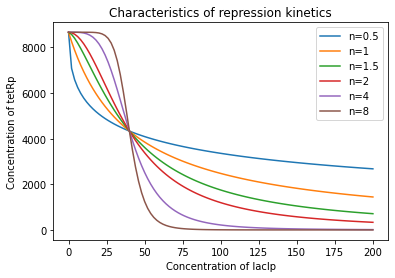

In [3]:
# default parameter values 
# to match Repressilator model
km = 30
km0 = 0.03
kdm = 0.3466
kp = 6.931
kdp = 0.06931
K = 40
n = 2
p_lacI = 0

# initial conditions
m_tetR0 = 0
p_tetR0 = 0

s0 = [m_tetR0, p_tetR0]

# time observations
t_max = 1000
t_obs = np.linspace(0,t_max,t_max+1) 

# Hill Coeffiecient values to test
n_vals = [0.5,1,1.5,2,4,8]

# lacI concentrations to test over
p_lacI_vals = np.linspace(0,200,101)

%matplotlib inline
figure, ax = plt.subplots(1,1)

for n in n_vals:
        p_tetR_vals = []
        
        for p_lacI  in p_lacI_vals:
            # set up parameters
            params = [km, km0, kdm, kp, kdp, K, n, p_lacI]

            # run simulation
            s_obs = odeint(sdot_repression,s0,t_obs,args=(params,))  
            m_tetR_obs = s_obs[:,0]
            p_tetR_obs = s_obs[:,1]

            # extract and stroe final protein level
            p_tetR_vals.append(p_tetR_obs[-1])
            
        ax.plot(p_lacI_vals, p_tetR_vals, label=f"n={n}")

ax.set_title("Characteristics of repression kinetics")
ax.set_xlabel("Concentration of lacIp")
ax.set_ylabel("Concentration of tetRp")
ax.legend()

# plt.savefig("Task1_figure1.png")